# EDA - UFC

### Title

Analysis of UFC Fighters: Physical and Technical Characteristics and Their Influence on Performance

### Description
This project aims to analyze different aspects of UFC fighters to see how they influence their performance.

### Hypothesis

The main objective of the project is to confirm whether certain physical aspects and fighting techniques influence a fighter's performance.

1. Relationship between height, weight, and reach. Evaluate if there is a correlation between these physical characteristics and performance in combat.

2. Impact of stance on performance. Determine if fighters with an "Orthodox" stance perform better (more victories) than fighters with a "Southpaw" stance.

3. Age and performance. Investigate if a fighter's age is correlated with their number of victories or defeats.

4. Comparison between strikers and grapplers. Examine if fighters who land more significant strikes per minute (SLpM) are more successful than those who focus more on takedowns and submissions.

### Python Libraries

In [644]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataframes

In [645]:
# Dataframes
# df_1 = pd.DataFrame()
# fuente_1 = "data/1-mma_ufc_fighter_data.csv"
# df_2 = pd.DataFrame()
# fuente_2 = "data/2-ufc-fighters-statistics-2024.csv"
# df_3 = pd.DataFrame()
# fuente_3 = "data/3-ufc-fighters-statistics.csv"
# df_6 = pd.DataFrame()
# fuente_6 = "data/6-ufc_fighter_stats.csv"

In [646]:
# First Dataframe
df1 = pd.read_csv("data/1-mma_ufc_fighter_data.csv", sep = ",")

### DataFrame Overview

In [647]:
df1.head()

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url
0,4107,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,1978-07-13,5,3,0,NaN,http://ufcstats.com/fighter-details/93fe7332d1...
1,4106,Danny,Abbadi,The Assassin,180.34,155.0,NaN,Orthodox,1983-07-03,4,6,0,NaN,http://ufcstats.com/fighter-details/15df64c02b...
2,4105,Nariman,Abbasov,Bayraktar,172.72,155.0,167.64,Orthodox,1994-02-01,28,4,0,NaN,http://ufcstats.com/fighter-details/59a9d6dac6...
3,4104,David,Abbott,Tank,182.88,265.0,NaN,Switch,NaN,10,15,0,NaN,http://ufcstats.com/fighter-details/b361180739...
4,4103,Hamdy,Abdelwahab,The Hammer,187.96,264.0,182.88,Southpaw,1993-01-22,5,0,0,1.0,http://ufcstats.com/fighter-details/3329d692ae...


In [648]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fighter_id          4107 non-null   int64  
 1   fighter_f_name      4107 non-null   object 
 2   fighter_l_name      4092 non-null   object 
 3   fighter_nickname    2250 non-null   object 
 4   fighter_height_cm   3797 non-null   float64
 5   fighter_weight_lbs  4020 non-null   float64
 6   fighter_reach_cm    2166 non-null   float64
 7   fighter_stance      3273 non-null   object 
 8   fighter_dob         3349 non-null   object 
 9   fighter_w           4107 non-null   int64  
 10  fighter_l           4107 non-null   int64  
 11  fighter_d           4107 non-null   int64  
 12  fighter_nc_dq       482 non-null    float64
 13  fighter_url         4107 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 449.3+ KB


In [649]:
df1.describe

<bound method NDFrame.describe of       fighter_id fighter_f_name fighter_l_name fighter_nickname  \
0           4107            Tom          Aaron              NaN   
1           4106          Danny         Abbadi     The Assassin   
2           4105        Nariman        Abbasov        Bayraktar   
3           4104          David         Abbott             Tank   
4           4103          Hamdy     Abdelwahab       The Hammer   
...          ...            ...            ...              ...   
4102           5           Dave       Zitanick              NaN   
4103           4           Alex         Zuniga              NaN   
4104           3         George         Zuniga              NaN   
4105           2          Allan         Zuniga            Tigre   
4106           1         Virgil        Zwicker           RezDog   

      fighter_height_cm  fighter_weight_lbs  fighter_reach_cm fighter_stance  \
0                   NaN               155.0               NaN            NaN   
1

### Data Wrangling

In [650]:
# Combine "fighter_f_name" and "fighter_l_name" columns.
df1['Name'] = df1['fighter_f_name'] + ' ' + df1['fighter_l_name']
# Remove columns
df1 = df1.drop(columns=['fighter_url', 'fighter_f_name', 'fighter_l_name'])
# Extract 'name' column
col = df1.pop('Name')
# Insert the column 'name' in the second position (index 1)
df1.insert(1, 'Name', col)
# Conversion factor from pounds to kilograms
lbs_to_kgs = 0.453592
# Convert 'weight_lbs' to kg, round and save in new column 'weight_kg'
df1['Weight_kg'] = (df1['fighter_weight_lbs'] * lbs_to_kgs).round(2)
# Extract the 'Weight_kg' column
col = df1.pop('Weight_kg')
# Insert the column 'Weight_kg' in the second position (index 1).
df1.insert(4, 'Weight_kg', col)
# Remove the "fighter_weight_lbs" column
df1 = df1.drop(columns=["fighter_weight_lbs"])

In [651]:
# Rename columns
df1.rename(columns={'fighter_id': 'id',
                    'fighter_nickname': 'Nickname',
                    'fighter_height_cm': 'Height_cm',
                    'fighter_reach_cm': 'Reach_cm',
                    'fighter_stance': 'Stance',
                    'fighter_dob': 'Date of Birth',
                    'fighter_w': 'Victories',
                    'fighter_l': 'Defeats',
                    'fighter_d': 'Draws',
                    }, inplace=True)
df1


,id,Name,Nickname,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Victories,Defeats,Draws,fighter_nc_dq
0,4107,Tom Aaron,NaN,NaN,70.31,NaN,NaN,1978-07-13,5,3,0,NaN
1,4106,Danny Abbadi,The Assassin,180.34,70.31,NaN,Orthodox,1983-07-03,4,6,0,NaN
2,4105,Nariman Abbasov,Bayraktar,172.72,70.31,167.64,Orthodox,1994-02-01,28,4,0,NaN
3,4104,David Abbott,Tank,182.88,120.20,NaN,Switch,NaN,10,15,0,NaN
4,4103,Hamdy Abdelwahab,The Hammer,187.96,119.75,182.88,Southpaw,1993-01-22,5,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4102,5,Dave Zitanick,NaN,NaN,77.11,NaN,NaN,1980-03-05,5,7,0,1.0
4103,4,Alex Zuniga,NaN,NaN,65.77,NaN,NaN,NaN,6,3,0,NaN
4104,3,George Zuniga,NaN,175.26,83.91,NaN,NaN,NaN,3,1,0,NaN
4105,2,Allan Zuniga,Tigre,170.18,70.31,177.80,Orthodox,1992-04-04,13,1,0,NaN


In [652]:
# Count disqualifications and no results (fighter_nc_dq).
contar_nan_descalificaciones = df1['fighter_nc_dq'].isna().sum()
contar_nan_descalificaciones

3625

In [653]:
# Delete column "fighter_nc_dq" (3625 NaN out of 4107 results).
df1 = df1.drop(columns=["fighter_nc_dq"])
# Delete the rows of fighters containing NaN values.
df1_sin_nan = df1.dropna()
df1_sin_nan

,id,Name,Nickname,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Victories,Defeats,Draws
2,4105,Nariman Abbasov,Bayraktar,172.72,70.31,167.64,Orthodox,1994-02-01,28,4,0
4,4103,Hamdy Abdelwahab,The Hammer,187.96,119.75,182.88,Southpaw,1993-01-22,5,0,0
5,4102,Shamil Abdurakhimov,Abrek,190.50,106.59,193.04,Orthodox,1981-09-02,20,8,0
10,4097,Klidson Abreu,White Bear,182.88,92.99,187.96,Orthodox,1992-12-24,15,4,0
13,4094,John Adajar,The Outlaw,175.26,77.11,190.50,Orthodox,1991-06-22,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4092,15,Zhang Mingyang,Mountain Tiger,187.96,92.99,190.50,Orthodox,1998-08-16,16,6,0
4094,13,Yao Zhikui,The Conqueror,165.10,56.70,162.56,Orthodox,1991-02-07,2,4,0
4096,11,Fares Ziam,Smile Killer,185.42,70.31,190.50,Orthodox,1997-03-21,14,4,0
4100,7,Cat Zingano,Alpha,167.64,65.77,172.72,Southpaw,1982-07-01,10,4,0


## Hypothesis 1  
Relationship between height, weight, and reach. Evaluate if there is a correlation between these physical characteristics and performance in combat.

In [654]:
# Determine the correlation between physical attributes and performance
# To do this, select the relevant columns for the correlation analysis
columnas_de_interes = ['Height_cm', 'Weight_kg', 'Reach_cm', 'Victories', 'Defeats', 'Draws']
df1_selec = df1[columnas_de_interes]

# Calculate the correlation matrix
correlation_matrix = df1_selec.corr()
correlation_matrix

,Height_cm,Weight_kg,Reach_cm,Victories,Defeats,Draws
Height_cm,1.000000,0.722857,0.887430,0.018164,0.036366,-0.036603
Weight_kg,0.722857,1.000000,0.751869,-0.020154,0.070190,0.003075
Reach_cm,0.887430,0.751869,1.000000,0.122573,0.068344,-0.035589
Victories,0.018164,-0.020154,0.122573,1.000000,0.625544,0.277186
Defeats,0.036366,0.070190,0.068344,0.625544,1.000000,0.349744
Draws,-0.036603,0.003075,-0.035589,0.277186,0.349744,1.000000


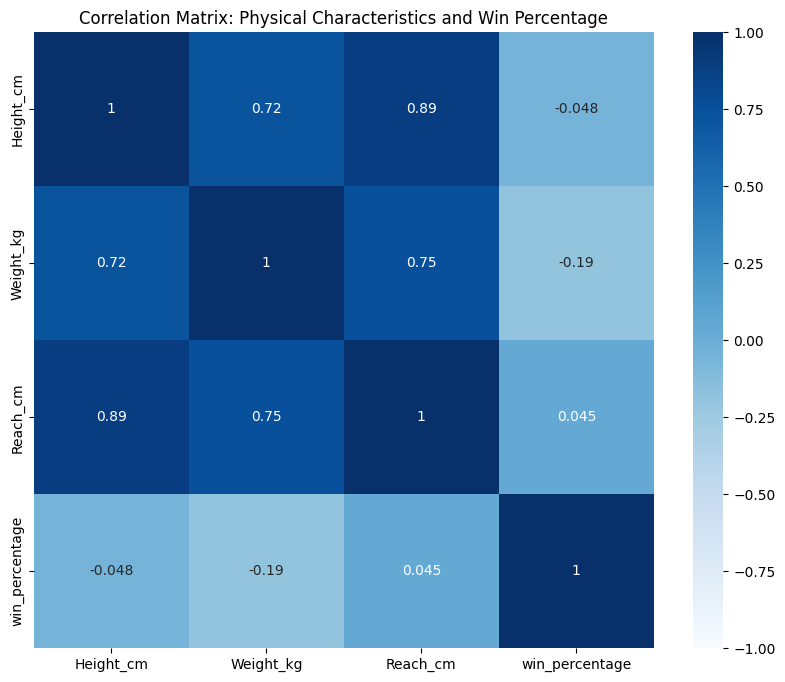

In [655]:
# Create new column for win percentage
df1['win_percentage'] = (df1['Victories'] / (df1['Victories'] + df1['Defeats'])) * 100

# Calculate the correlation matrix between physique and winning percentage
matriz_rendimiento = df1[['Height_cm', 'Weight_kg', 'Reach_cm', 'win_percentage']].corr()

# Correlation matrix chart
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_rendimiento, annot=True, cmap='Blues', vmin=-1, vmax=1)  # Cambiar 'Reds' por 'Blues' para el color skyblue
plt.title('Correlation Matrix: Physical Characteristics and Win Percentage')
plt.show()

## Hypothesis 2  
Impact of stance on performance. Determine if fighters with an "Orthodox" stance perform better (more victories) than fighters with a "Southpaw" stance.

In [656]:
# df1 Count the number of fighters in the df using Open Stance
num_open_stance = (df1['Stance'] == 'Open Stance').sum()
num_open_stance

7

In [657]:
# df1 Count the number of fighters in the df using Sideways stance
num_sideways = (df1['Stance'] == 'Sideways').sum()
num_sideways

3

In [658]:
# df1 Percentage of each stance type
stance_porcentajes = (stance_counts / stance_counts.sum()) * 100

# Round the results to 2 decimal places
stance_porcentajes_redondeado = stance_porcentajes.round(2)
stance_porcentajes_redondeado

stance
Orthodox       76.82
Southpaw       17.03
Switch          5.84
Open Stance     0.21
Sideways        0.09
Name: count, dtype: float64

In [659]:
# df1 Removes all rows from df1 where the 'Stance' column has the value 'Open Stance'.
df1 = df1.loc[df1['Stance'] != 'Open Stance']

In [660]:
# df1 Removes all rows from df1 where the 'Stance' column has the value 'Sideways'.
df1 = df1.loc[df1['Stance'] != 'Sideways']

In [661]:
# df1 Filter DataFrame to remove "Open Stance"and "Sideways"
df_filtered = df1[(df1['Stance'] != 'Open Stance') & (df1['Stance'] != 'Sideways')]

# df1 Count frequency for each stance type
stance_counts = df_filtered['Stance'].value_counts()

# df1 Percentage for each stance type
stance_percentages = (stance_counts / stance_counts.sum()) * 100

# df1 Round to 2 decimals
stance_percentages_rounded = stance_percentages.round(2)
stance_percentages_rounded

Stance
Orthodox    77.02
Southpaw    17.13
Switch       5.85
Name: count, dtype: float64

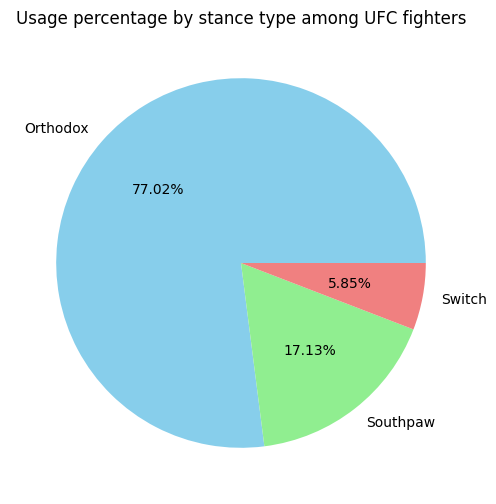

In [662]:
# df1 Plot Usage Percentage by Stance Type
stance_percentages_rounded = {
    'Orthodox': 77.02,
    'Southpaw': 17.13,
    'Switch': 5.85,
}
# Pie plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(stance_percentages_rounded.values(), labels=stance_percentages_rounded.keys(), autopct='%1.2f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Usage percentage by stance type among UFC fighters')

plt.show()

In [663]:
# df muestra_luchadores
# Calculate percentage of wins using only a sample of 190 fighters by stance type.
muestra_luchadores = pd.read_csv("data/muestra_luchadores.csv", sep = ",")

# Calcular el porcentaje de victorias
muestra_luchadores['total_fights'] = muestra_luchadores['wins'] + muestra_luchadores['losses']
muestra_luchadores['win_percentage'] = (muestra_luchadores['wins'] / muestra_luchadores['total_fights']) * 100

# Agrupar por tipo de guardia y calcular el promedio de porcentaje de victorias
win_percentage_by_stance = muestra_luchadores.groupby('stance')['win_percentage'].mean()

# Mostrar el resultado
print(win_percentage_by_stance)

stance
Orthodox    70.118607
Southpaw    67.892745
Switch      74.315082
Name: win_percentage, dtype: float64


In [664]:
# Sample of fighters
muestra_luchadores

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,...,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Name,total_fights,win_percentage
0,Jose Barreto,NaN,0,1,0,NaN,83.91,NaN,Southpaw,NaN,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,jose barreto,1,0.000000
1,Natalia Silva,NaN,16,5,1,162.56,56.70,165.10,Southpaw,1997-02-03,...,48.0,2.23,65.0,0.68,33.0,92.0,0.0,natalia silva,21,76.190476
2,Rama Supandhi,Hellboy,8,4,0,165.10,56.70,167.64,Southpaw,1991-11-07,...,42.0,3.53,48.0,1.00,11.0,0.0,0.0,rama supandhi,12,66.666667
3,Justin Salas,J-Bomb,12,7,0,172.72,70.31,177.80,Southpaw,1982-03-13,...,43.0,2.96,68.0,2.43,20.0,0.0,0.0,justin salas,19,63.157895
4,Peter Petties,The Joker,5,3,0,180.34,65.77,182.88,Southpaw,1990-12-20,...,29.0,8.24,48.0,0.00,0.0,0.0,0.0,peter petties,8,62.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Blood Diamond,NaN,3,3,0,180.34,77.11,193.04,Switch,1988-07-10,...,55.0,2.17,48.0,0.00,0.0,73.0,0.0,blood diamond,6,50.000000
566,Gabe Green,Gifted,11,5,0,177.80,77.11,185.42,Switch,1993-05-02,...,45.0,6.95,47.0,0.83,50.0,53.0,0.3,gabe green,16,68.750000
567,Gregory Bouchelaghem,NaN,5,4,0,187.96,83.01,NaN,Switch,NaN,...,21.0,1.53,36.0,0.00,0.0,50.0,0.0,gregory bouchelaghem,9,55.555556
568,Kiefer Crosbie,BDK,10,4,0,180.34,77.11,177.80,Switch,1990-04-05,...,66.0,6.02,50.0,0.00,0.0,0.0,0.0,kiefer crosbie,14,71.428571


In [665]:
# df muestra_luchadores
# Calculate the total fights (wins + losses + draws) for each stance type. (This have been calculated with a sample of 190 fighters for each stance type, 570 in total.)
muestra_luchadores['total_fights'] = muestra_luchadores['wins'] + muestra_luchadores['losses'] + muestra_luchadores['draws']

# Calculate the total number of wins and total fights for each stance type
stance_wins = muestra_luchadores.groupby('stance')['wins'].sum()
total_fights_per_stance = muestra_luchadores.groupby('stance')['total_fights'].sum()

# Calculate the win percentage for each stance type
stance_win_percentage_correct = (stance_wins / total_fights_per_stance) * 100

# Filter only the desired stance types
stance_win_percentage_correct = stance_win_percentage_correct[['Southpaw', 'Orthodox', 'Switch']]

# Display the percentages
print(stance_win_percentage_correct)

stance
Southpaw    68.404669
Orthodox    69.046957
Switch      72.113794
dtype: float64


In [666]:
# df muestra_luchadores
# Calculate the total fights (wins + losses + draws) for each stance type
muestra_luchadores['total_fights'] = muestra_luchadores['wins'] + muestra_luchadores['losses'] + muestra_luchadores['draws']

In [667]:
# df muestra_luchadores
# Calculate the total number of wins and total fights for each stance type
stance_wins = muestra_luchadores.groupby('stance')['wins'].sum()
total_fights_per_stance = muestra_luchadores.groupby('stance')['total_fights'].sum()

In [668]:
# df muestra_luchadores
# Filter only the desired stance types
stance_win_percentage_correct = stance_win_percentage_correct[['Southpaw', 'Orthodox', 'Switch']]

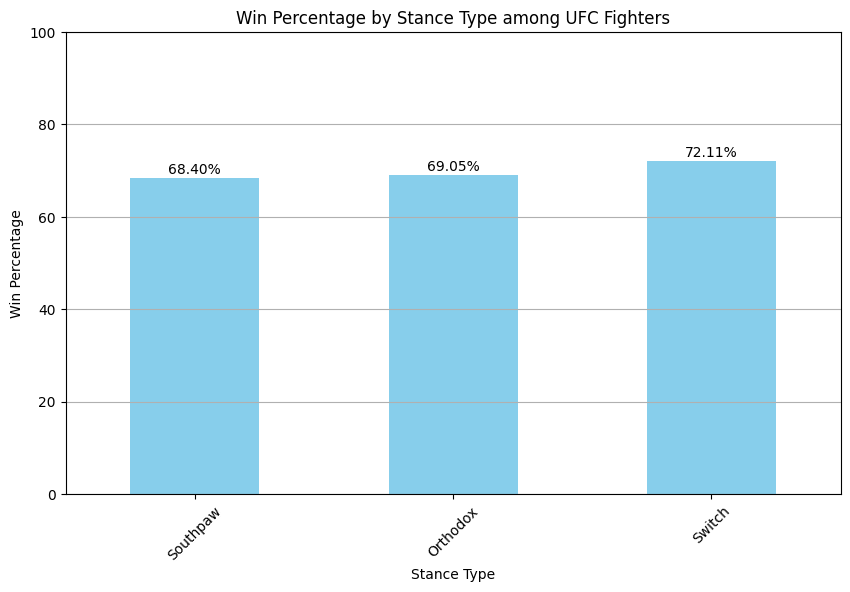

In [702]:
# df muestra_luchadores
# Plotting the bar chart
plt.figure(figsize=(10, 6))
stance_win_percentage_correct.plot(kind='bar', color='skyblue')
plt.title('Win Percentage by Stance Type among UFC Fighters')
plt.xlabel('Stance Type')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')

# Display percentages on top of the bars
for index, value in enumerate(stance_win_percentage_correct):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.show()

In [670]:
# Define df_stats
data = {
    'stance': ['Orthodox', 'Southpaw', 'Switch'],
    'wins': [2485, 2637, 2180]
}

stance_stats = pd.DataFrame(data)

In [671]:
print(stance_stats.columns)

Index(['stance', 'wins'], dtype='object')


In [672]:
# Filter wins and defeats by stance type without including "Open Stance" and "Sideways"
df_filtered = df1[(df1['Stance'] != 'Open Stance') & (df1['Stance'] != 'Sideways')]

columnas_de_interes = ['Stance', 'Victories', 'Defeats']
df_selec_filtrado = df_filtered[columnas_de_interes]

df_selec_filtrado = df_selec_filtrado.dropna()

stance_stats = df_selec_filtrado.groupby('Stance').mean().round(2)

stance_stats

,Victories,Defeats
Stance,,
Orthodox,13.42,6.01
Southpaw,14.62,6.33
Switch,11.43,4.21


In [673]:
print(df_stats.head())

     stance  wins
0  Orthodox  2485
1  Southpaw  2637
2    Switch  2180


In [674]:
# Count the total number of fighters in DataFrame df1 and display them by stance type
stance_counts_df1 = df1['Stance'].value_counts()

# Show
print(stance_counts_df1)

Stance
Orthodox    2513
Southpaw     559
Switch       191
Name: count, dtype: int64


In [675]:
# Average of wins by stance type
data = {
    'Guard Type': ['Orthodox', 'Southpaw', 'Switch'],
    'Victories': [13.42, 14.62, 11.43],
    'Defeats': [6.01, 6.33, 4.21]
}
stance_stats = pd.DataFrame(data)
stance_stats.set_index('Guard Type', inplace=True)

# Calculate the percentage of wins
stance_stats['Victories Percentage'] = (stance_stats['Victories'] / (stance_stats['Victories'] + stance_stats['Defeats'])) * 100
stance_stats

,Victories,Defeats,Victories Percentage
Guard Type,,,
Orthodox,13.42,6.01,69.068451
Southpaw,14.62,6.33,69.785203
Switch,11.43,4.21,73.081841


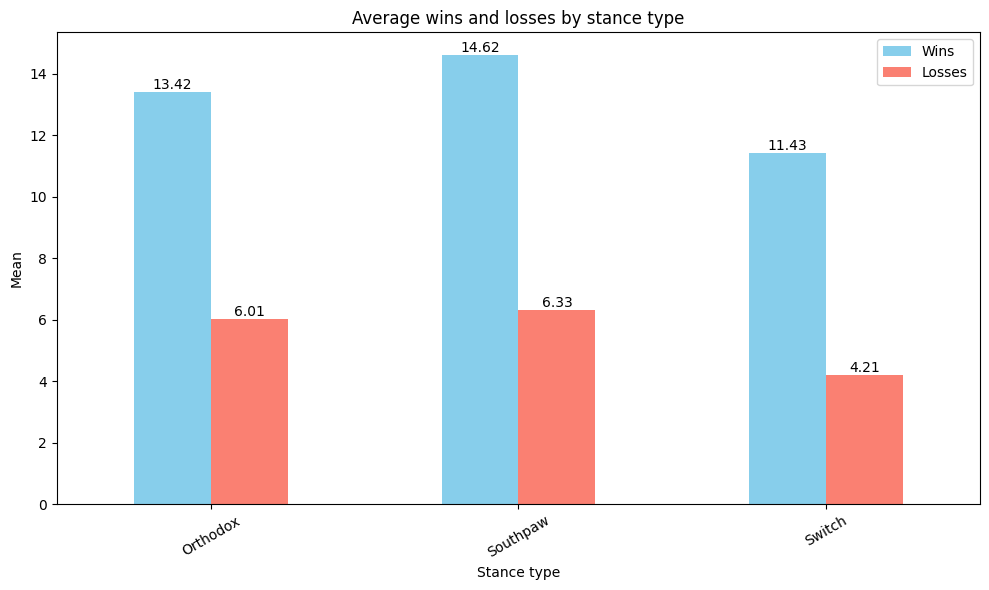

In [676]:
# Graph showing average wins and losses. (Calculated with 3263 fighters (2513 Orthodox, 559 Southpaw and 191 Switch)
ax = stance_stats[['Victories', 'Defeats']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

# Information
plt.xlabel('Stance type')
plt.ylabel('Mean')
plt.title('Average wins and losses by stance type')
plt.xticks(rotation=30)
plt.legend(['Wins', 'Losses'])

# Add averages over each bar of the chart
for i, bars in enumerate(ax.containers):
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Add only if the value is greater than 0
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 2)}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

In [677]:
# Select columns
columnas_de_interes = ['stance', 'wins', 'losses']
muestra_luchadores = muestra_luchadores[columnas_de_interes]

# Group by stance type and add number of wins
stance_victorias = muestra_luchadores.groupby('stance')['wins'].sum()

stance_victorias

stance
Orthodox    2485
Southpaw    2637
Switch      2180
Name: wins, dtype: int64

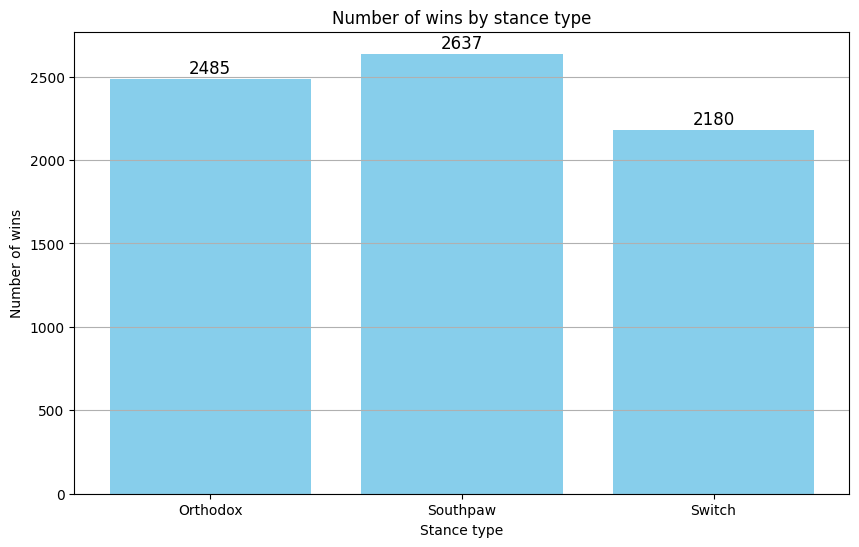

In [678]:
# Graph to show how the victories are distributed with a random sample of 190 fighters of each type of guard. 570 in total.
data = {
    'stance': ['Orthodox', 'Southpaw', 'Switch'],
    'wins': [2485, 2637, 2180]
}

# Create the DataFrame
muestra_luchadores = pd.DataFrame(data)

# Create a bar chart to visualize the number of wins by stance type
plt.figure(figsize=(10, 6))
bars = plt.bar(muestra_luchadores['stance'], muestra_luchadores['wins'], color='skyblue')
plt.title('Number of wins by stance type')
plt.xlabel('Stance type')
plt.ylabel('Number of wins')
plt.grid(axis='y')

# Adding the number of wins above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [679]:
# df1
print(stance_stats.columns)

Index(['Victories', 'Defeats', 'Victories Percentage'], dtype='object')


In [680]:
# df2 Second Dataframe
df2 = pd.read_csv("data/2-ufc-fighters-statistics-2024.csv", sep = ",")

In [681]:
# df2
# Rename columns
# Dictionary with current and new column names
nuevas_columnas = {
    'name': 'Name',
    'wins': 'Victories',
    'losses': 'Defeats',
    'height_cm': 'Height_cm',
    'weight_in_kg': 'Weight_kg',
    'reach_in_cm': 'Reach_cm',
    'stance': 'Stance',
    'date_of_birth': 'Date of Birth',
    'significant_strikes_landed_per_minute': 'Sig_Strikes_Minute',
    'significant_striking_accuracy': 'Sig_Strikes Accuracy',
    'significant_strikes_absorbed_per_minute': 'Sig_Strikes_Absorved_Min',
    'significant_strike_defence': 'Sig_Strikes_Defence',
    'average_takedowns_landed_per_15_minutes': 'Av_TD_Landed_per_15_Min',
    'takedown_accuracy': 'Takedown_Accuracy',
    'takedown_defense': 'Takedown_Defence',
    'average_submissions_attempted_per_15_minutes': 'Av_Subm_Attemt_per_15_Min',
}

# Rename
df2.rename(columns=nuevas_columnas, inplace=True)
df2

,Name,nickname,Victories,Defeats,draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [682]:
# df2 Delete fighter rows containing NaN values
df2_sin_nan = df2.dropna()
df2_sin_nan

,Name,nickname,Victories,Defeats,draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
22,Dione Barbosa,The Witch,6,2,0,167.64,56.70,167.64,Orthodox,1992-05-08,0.87,50.0,0.65,66.0,3.27,100.0,0.0,9.8
23,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.00,0.0,0.0,9.8
53,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,3.05,49.0,2.82,35.0,0.00,0.0,50.0,6.1
59,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,Kyron Bowen,Bullseye,9,5,0,190.50,83.91,185.42,Orthodox,1993-12-22,2.73,57.0,2.05,40.0,0.00,0.0,0.0,0.0
4096,Eperaim Ginting,The Wolfman,6,1,0,162.56,61.23,162.56,Orthodox,1995-11-30,0.00,0.0,0.00,100.0,15.52,100.0,0.0,0.0
4099,Jamelle Jones,The Beast,7,5,0,182.88,92.99,190.50,Orthodox,1988-01-31,1.78,80.0,3.11,65.0,0.00,0.0,0.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [683]:
# df2 Delete columns
df2 = df2.drop(columns=["nickname"])

In [684]:
#  df2 Delete draws
df2 = df2.drop(columns=["draws"])
df2

,Name,Victories,Defeats,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Robert Drysdale,7,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,15,37,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,13,9,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,7,4,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,8,2,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,1,1,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,12,20,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,6,1,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [685]:
# Sixth dataframe
df6 = pd.read_csv("data/6-ufc_fighter_stats.csv", sep = ",")
df6

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [686]:
# df6 Rename columns
# Diccionariy with current and new names
nuevas_columnas = {
    'name': 'Name',
    #'nickname': 'Nickname',
    'wins': 'Victories',
    'losses': 'Defeats',
    #'draws': 'Draws',
    'height': 'Height_cm',
    'weight': 'Weight_kg',
    'reach': 'Reach_cm',
    'stance': 'Stance',
    'age': 'Date of Birth',
    #'significant_strikes_landed_per_minute': 'Sig_Strikes_Minute',
    'sig_str_acc': 'Sig_Strikes Accuracy',
    'significant_strikes_absorbed_per_minute': 'Sig_Strikes_Absorved_Min',
    'significant_strike_defence': 'Sig_Strikes_Defence',
    'td_avg': 'Av_TD_Landed_per_15_Min',
    'td_acc': 'Takedown_Accuracy',
    'td_def': 'Takedown_Defence',
    'sub_avg': 'Av_Subm_Attemt_per_15_Min',
}

# Rename columns
df6.rename(columns=nuevas_columnas, inplace=True)
df6

,Name,Victories,Defeats,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,SLpM,Sig_Strikes Accuracy,SApM,str_def,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [687]:
# df2+df6 Load DataFrames from the CSV files
file_path2 = 'data/2-ufc-fighters-statistics-2024.csv'
file_path6 = 'data/6-ufc_fighter_stats.csv'

df2 = pd.read_csv(file_path2)
df6 = pd.read_csv(file_path6)

# Inspect the DataFrames
print(df2.head())
print(df6.head())

# Clean the data
# Remove extra whitespace and convert to lowercase
df2['Name'] = df2['name'].str.strip().str.lower()
df6['Name'] = df6['name'].str.strip().str.lower()

# Perform the merge using the column of fighter names as a key
merged_df = pd.merge(df2, df6, on='Name', how='inner')

# Remove Duplicates and Filter Rows with Empty Fields
merged_df.drop_duplicates(subset='Name', inplace=True)
merged_df.dropna(inplace=True)

# Show the resulting DataFrame
print(merged_df.head())

                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                            

In [688]:
# merged_df (df2+df6)
# Rename columns
# Diccionariy with current and new names
nuevas_columnas = {
    'name_x': 'Name',
    'nickname': 'Nickname',
    'wins_x': 'Victories',
    'losses_x': 'Defeats',
    'draws': 'Draws',
    'height_cm': 'Height_cm',
    'weight_in_kg': 'Weight_kg',
    'reach_in_cm': 'Reach_cm',
    'date_of_birth': 'Date of Birth',
    'Sig_Strikes_Minute': 'Stancey',
    'age': 'Age',
    'SLpM': 'Sig_Strikes_Minute',
    'sig_str_acc': 'Sig_Strikes Accuracy',
    'SApM': 'Sig_Strikes_Absorved_Min',
    'str_def': 'Sig_Strikes_Defence',
    'td_avg': 'Av_TD_Landed_per_15_Min',
    'td_acc': 'Takedown_Accuracy',
    'td_def': 'Takedown_Defence',
    'sub_avg': 'Av_Subm_Attemt_per_15_Min',
}

# Rename columns
merged_df.rename(columns=nuevas_columnas, inplace=True)
merged_df

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,stance_x,Date of Birth,...,stance_y,Age,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
5,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,...,Switch,30.0,3.93,0.66,6.56,0.28,0.00,0.00,0.00,9.8
12,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,...,Orthodox,37.0,3.05,0.49,2.82,0.35,0.00,0.00,0.50,6.1
15,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,...,Orthodox,45.0,1.80,0.50,2.04,0.46,7.19,0.80,0.80,5.4
16,Matt Arroyo,No Regard,3,3,0,177.80,77.11,182.88,Orthodox,1982-09-01,...,Orthodox,41.0,1.62,0.47,2.01,0.58,2.12,0.36,1.00,5.3
23,Ronda Rousey,Rowdy,12,2,0,170.18,61.23,167.64,Orthodox,1987-02-01,...,Orthodox,37.0,4.17,0.52,4.14,0.44,6.26,0.68,0.50,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,Norma Dumont,The Immortal,10,2,0,170.18,65.77,170.18,Orthodox,1990-10-01,...,Orthodox,33.0,3.41,0.49,1.99,0.66,1.39,0.64,0.72,0.0
2454,Cristian Quinonez,Problema,18,4,0,172.72,61.23,177.80,Orthodox,1996-04-26,...,Orthodox,27.0,4.19,0.40,4.55,0.55,1.37,0.37,0.84,0.0
2456,Shinsho Anzai,Animal,10,3,0,170.18,77.11,177.80,Orthodox,1985-12-01,...,Orthodox,38.0,3.23,0.58,3.75,0.45,1.83,0.16,0.75,0.0
2458,Dusko Todorovic,Thunder,12,4,0,185.42,83.91,187.96,Orthodox,1994-05-19,...,Orthodox,29.0,5.54,0.57,4.55,0.46,0.96,0.12,0.45,0.0


In [689]:
merged_df.head()

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,stance_x,Date of Birth,...,stance_y,Age,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
5,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,...,Switch,30.0,3.93,0.66,6.56,0.28,0.00,0.00,0.0,9.8
12,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,...,Orthodox,37.0,3.05,0.49,2.82,0.35,0.00,0.00,0.5,6.1
15,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,...,Orthodox,45.0,1.80,0.50,2.04,0.46,7.19,0.80,0.8,5.4
16,Matt Arroyo,No Regard,3,3,0,177.80,77.11,182.88,Orthodox,1982-09-01,...,Orthodox,41.0,1.62,0.47,2.01,0.58,2.12,0.36,1.0,5.3
23,Ronda Rousey,Rowdy,12,2,0,170.18,61.23,167.64,Orthodox,1987-02-01,...,Orthodox,37.0,4.17,0.52,4.14,0.44,6.26,0.68,0.5,4.8


In [ ]:
# merged_df (df2+df6)
# Remove columns
merged_df = merged_df.drop(columns=["Sig_Strikes_Minute.1", "Sig_Strikes Accuracy", "Sig_Strikes_Absorved_Min", "Sig_Strikes_Defence", "Av_TD_Landed_per_15_Min", "Takedown_Accuracy", "Takedown_Defence", "Av_Subm_Attemt_per_15_Min"])

In [623]:
# merged_df (df2+df6)
for col in merged_df.columns:
    print(col)

Name
Nickname
Victories
Defeats
Draws
Height_cm
Weight_kg
Reach_cm
stance_x
Date of Birth
significant_strikes_landed_per_minute
significant_striking_accuracy
significant_strikes_absorbed_per_minute
significant_strike_defence
average_takedowns_landed_per_15_minutes
takedown_accuracy
takedown_defense
average_submissions_attempted_per_15_minutes
Name
name_y
wins_y
losses_y
height
weight
reach
stance_y
Age
Sig_Strikes_Minute
Sig_Strikes Accuracy
Sig_Strikes_Absorved_Min
Sig_Strikes_Defence
Av_TD_Landed_per_15_Min
Takedown_Accuracy
Takedown_Defence
Av_Subm_Attemt_per_15_Min


In [691]:
# merged_df (df2+df6)
# Save dataframe in new CSV
merged_df.to_csv('data/merged_ufc_fighters.csv', index=False)

In [692]:
# merged_df (df2+df6)
merged_df.head()
merged_df = pd.read_csv("data/merged_ufc_fighters.csv", sep = ",")
merged_df

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,stance_x,Date of Birth,...,stance_y,Age,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,...,Switch,30.0,3.93,0.66,6.56,0.28,0.00,0.00,0.00,9.8
1,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,...,Orthodox,37.0,3.05,0.49,2.82,0.35,0.00,0.00,0.50,6.1
2,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,...,Orthodox,45.0,1.80,0.50,2.04,0.46,7.19,0.80,0.80,5.4
3,Matt Arroyo,No Regard,3,3,0,177.80,77.11,182.88,Orthodox,1982-09-01,...,Orthodox,41.0,1.62,0.47,2.01,0.58,2.12,0.36,1.00,5.3
4,Ronda Rousey,Rowdy,12,2,0,170.18,61.23,167.64,Orthodox,1987-02-01,...,Orthodox,37.0,4.17,0.52,4.14,0.44,6.26,0.68,0.50,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Norma Dumont,The Immortal,10,2,0,170.18,65.77,170.18,Orthodox,1990-10-01,...,Orthodox,33.0,3.41,0.49,1.99,0.66,1.39,0.64,0.72,0.0
1262,Cristian Quinonez,Problema,18,4,0,172.72,61.23,177.80,Orthodox,1996-04-26,...,Orthodox,27.0,4.19,0.40,4.55,0.55,1.37,0.37,0.84,0.0
1263,Shinsho Anzai,Animal,10,3,0,170.18,77.11,177.80,Orthodox,1985-12-01,...,Orthodox,38.0,3.23,0.58,3.75,0.45,1.83,0.16,0.75,0.0
1264,Dusko Todorovic,Thunder,12,4,0,185.42,83.91,187.96,Orthodox,1994-05-19,...,Orthodox,29.0,5.54,0.57,4.55,0.46,0.96,0.12,0.45,0.0


In [693]:
# df2

# Calculate the number of fighters using each stance type
stance_counts = df2['stance'].value_counts()

# Show result
print(stance_counts)

stance
Orthodox       2526
Southpaw        560
Switch          192
Open Stance       7
Sideways          3
Name: count, dtype: int64


In [694]:
# df muestra_luchadores
# Select 190 fighters randomly from each of the three most common guard types
# discard the other two because they barely have fighters (3 and 7)
# Create a new dataframe

# Filter the DataFrame to get only the fighters with the specific stances
southpaw_fighters = df2[df2['stance'] == 'Southpaw']
orthodox_fighters = df2[df2['stance'] == 'Orthodox']
switch_fighters = df2[df2['stance'] == 'Switch']

# Randomly select 190 fighters of each guard type
southpaw_muestra = southpaw_fighters.sample(n=190, random_state=1)
orthodox_muestra = orthodox_fighters.sample(n=190, random_state=1)
switch_muestra = switch_fighters.sample(n=190, random_state=1)


# Concatenate the samples into a single DataFrame
muestra_luchadores = pd.concat([southpaw_muestra, orthodox_muestra, switch_muestra])

# Show the number of selected fighters of each guard type
print(muestra_luchadores['stance'].value_counts())

# Save the results to a new CSV file
muestra_luchadores.to_csv('data/muestra_luchadores.csv', index=False)
muestra_luchadores

stance
Southpaw    190
Orthodox    190
Switch      190
Name: count, dtype: int64


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Name
2350,Jose Barreto,NaN,0,1,0,NaN,83.91,NaN,Southpaw,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,jose barreto
3742,Natalia Silva,NaN,16,5,1,162.56,56.70,165.10,Southpaw,1997-02-03,5.20,48.0,2.23,65.0,0.68,33.0,92.0,0.0,natalia silva
2247,Rama Supandhi,Hellboy,8,4,0,165.10,56.70,167.64,Southpaw,1991-11-07,2.20,42.0,3.53,48.0,1.00,11.0,0.0,0.0,rama supandhi
3444,Justin Salas,J-Bomb,12,7,0,172.72,70.31,177.80,Southpaw,1982-03-13,3.42,43.0,2.96,68.0,2.43,20.0,0.0,0.0,justin salas
3375,Peter Petties,The Joker,5,3,0,180.34,65.77,182.88,Southpaw,1990-12-20,2.61,29.0,8.24,48.0,0.00,0.0,0.0,0.0,peter petties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,Blood Diamond,NaN,3,3,0,180.34,77.11,193.04,Switch,1988-07-10,3.12,55.0,2.17,48.0,0.00,0.0,73.0,0.0,blood diamond
1554,Gabe Green,Gifted,11,5,0,177.80,77.11,185.42,Switch,1993-05-02,6.28,45.0,6.95,47.0,0.83,50.0,53.0,0.3,gabe green
2564,Gregory Bouchelaghem,NaN,5,4,0,187.96,83.01,NaN,Switch,NaN,0.27,21.0,1.53,36.0,0.00,0.0,50.0,0.0,gregory bouchelaghem
2713,Kiefer Crosbie,BDK,10,4,0,180.34,77.11,177.80,Switch,1990-04-05,8.10,66.0,6.02,50.0,0.00,0.0,0.0,0.0,kiefer crosbie


## Hypothesis 3

In [695]:
from datetime import datetime

In [696]:
# In this list there are two fi=ghters 60 y.o.
merged_df[merged_df['Age'] == merged_df['Age'].max()]

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,stance_x,Date of Birth,...,stance_y,Age,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
36,Ken Shamrock,The World's Most Dangerous Man,28,17,2,185.42,92.99,182.88,Orthodox,1964-02-11,...,Orthodox,60.0,1.47,0.46,4.30,0.39,0.94,0.60,0.44,2.5
480,Randy Couture,The Natural,19,11,0,185.42,92.99,190.50,Orthodox,1963-06-22,...,Orthodox,60.0,2.85,0.57,1.53,0.59,2.78,0.46,0.58,0.5


In [697]:
# Convert 'Date of Birth' column to datetime format
df1['Date of Birth'] = pd.to_datetime(df1['Date of Birth'], errors='coerce')

# Calculate the age of each fighter
current_year = datetime.now().year
df1['fighter_age'] = current_year - df1['Date of Birth'].dt.year


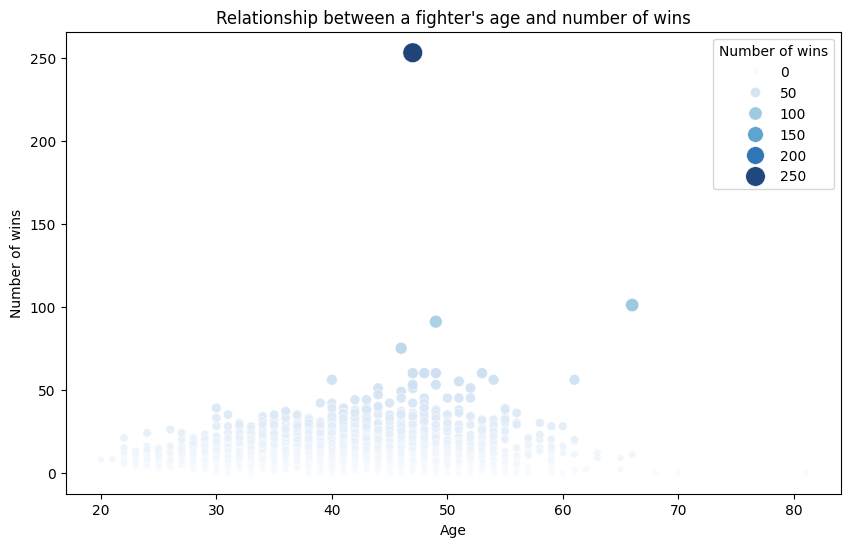

             fighter_age  Victories
fighter_age     1.000000   0.186036
Victories       0.186036   1.000000


In [698]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fighter_age', y='Victories', data=df1, hue='Victories', palette='Blues', alpha=0.9, size='Victories', sizes=(20, 200))
plt.title('Relationship between a fighter\'s age and number of wins')
plt.xlabel('Age')
plt.ylabel('Number of wins')
plt.legend(title='Number of wins')
plt.show()

corr_edad_victorias = df1[['fighter_age', 'Victories']].corr()

print(corr_edad_victorias)

## Hypothesis 4  
We will compare strikers with grapplers to see if strikers are more successful than those who focus on takedowns and submissions.

In [699]:
# Comparison between Strikers and Grapplers
# Threshold to classify fighters
strike_threshold = 2.0  # Adjust this value according to the data distribution
takedown_threshold = 1.0  # Adjust this value according to the data distribution

# Classify fighters
merged_df['Fighter Type'] = 'Mixed'
merged_df.loc[(merged_df['significant_strikes_landed_per_minute'] > strike_threshold) & 
       (merged_df['significant_striking_accuracy'] > 50), 'Fighter Type'] = 'Striker'
merged_df.loc[(merged_df['average_takedowns_landed_per_15_minutes'] > takedown_threshold) | 
       (merged_df['average_submissions_attempted_per_15_minutes'] > 0.5), 'Fighter Type'] = 'Grappler'

# Calculate total wins for each group
victories_by_type = merged_df.groupby('Fighter Type')['Victories'].sum()

# Show results
victories_by_type

Fighter Type
Grappler    13748
Mixed        4841
Striker      1114
Name: Victories, dtype: int64

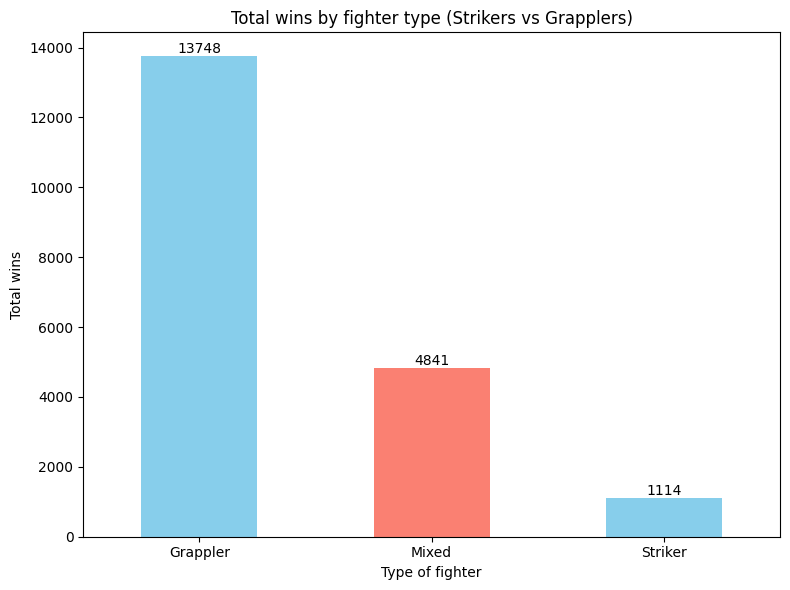

In [700]:
# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
victories_by_type.plot(kind='bar', color=['skyblue', 'salmon'], ax=ax)

# Labels and title
plt.xlabel('Type of fighter')
plt.ylabel('Total wins')
plt.title('Total wins by fighter type (Strikers vs Grapplers)')
plt.xticks(rotation=0)

# Add labels on each bar
for i, v in enumerate(victories_by_type):
    ax.text(i, v + 1, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
